# Credit Card Fraud Detection

### Anonymized credit card transactions labeled as fraudulent or genuine

### Context
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

### Content
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

### Inspiration
Identify fraudulent credit card transactions.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

### Acknowledgements
The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection. More details on current and past projects on related topics are available on https://www.researchgate.net/project/Fraud-detection-5 and the page of the DefeatFraud project

Please cite the following works:

Andrea Dal Pozzolo, Olivier Caelen, Reid A. Johnson and Gianluca Bontempi. Calibrating Probability with Undersampling for Unbalanced Classification. In Symposium on Computational Intelligence and Data Mining (CIDM), IEEE, 2015

Dal Pozzolo, Andrea; Caelen, Olivier; Le Borgne, Yann-Ael; Waterschoot, Serge; Bontempi, Gianluca. Learned lessons in credit card fraud detection from a practitioner perspective, Expert systems with applications,41,10,4915-4928,2014, Pergamon

Dal Pozzolo, Andrea; Boracchi, Giacomo; Caelen, Olivier; Alippi, Cesare; Bontempi, Gianluca. Credit card fraud detection: a realistic modeling and a novel learning strategy, IEEE transactions on neural networks and learning systems,29,8,3784-3797,2018,IEEE

Dal Pozzolo, Andrea Adaptive Machine learning for credit card fraud detection ULB MLG PhD thesis (supervised by G. Bontempi)

Carcillo, Fabrizio; Dal Pozzolo, Andrea; Le Borgne, Yann-Aël; Caelen, Olivier; Mazzer, Yannis; Bontempi, Gianluca. Scarff: a scalable framework for streaming credit card fraud detection with Spark, Information fusion,41, 182-194,2018,Elsevier

Carcillo, Fabrizio; Le Borgne, Yann-Aël; Caelen, Olivier; Bontempi, Gianluca. Streaming active learning strategies for real-life credit card fraud detection: assessment and visualization, International Journal of Data Science and Analytics, 5,4,285-300,2018,Springer International Publishing

Bertrand Lebichot, Yann-Aël Le Borgne, Liyun He, Frederic Oblé, Gianluca Bontempi Deep-Learning Domain Adaptation Techniques for Credit Cards Fraud Detection, INNSBDDL 2019: Recent Advances in Big Data and Deep Learning, pp 78-88, 2019

Fabrizio Carcillo, Yann-Aël Le Borgne, Olivier Caelen, Frederic Oblé, Gianluca Bontempi Combining Unsupervised and Supervised Learning in Credit Card Fraud Detection Information Sciences, 2019

- Our classes are highly imbalanced. We have 492 fraudulent transactions and 284,315 genuine transactions. This poses some threat to our models as they may learn the genuine transactions too much and find it hard to detect fraudulent patterns. Perhaps, anomaly detection will be good to consider later. 
- Picking a random model that classfies every transaction as genuine will give us an accuracy of (284,315/284,807=99.8%). 
- Therefore, our aim is to be able to identify the positive classes, that is every instance of the fraudulent transaction. 
- TRADEOFF: If we mistakenly classify a genuine transaction as being fraudulent, it's not as bad as classifying a fraudulent transaction as genuine. For the first part of the misclassification, we can send these transactions through another level of authentication to verify that customers are only charged for items they purchased, thus minimizing genuine transactions that were incorrectly flagged as fraudulent.

### Setup

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt

In [388]:
pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', -1)
sns.set_style('whitegrid')

In [3]:
import warnings
warnings.filterwarnings('ignore')

### Get the Data and Explore.

In [4]:
ccFraud = pd.read_csv('creditcard.csv')

In [5]:
ccFraud.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


- Time: contains the seconds elapsed between each transaction and the first transaction in the dataset.
- Amount: transaction amount.
- V1-V28: principal components obtained with PCA, hence they are independent of one another.
- Class: response variable which takes the value 1 in case of Fraud and 0 otherwise.

In [6]:
ccFraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

- The data contains only numerical variables and **NO MISSING DATA!!**
- There are 31 variables (30 predictors and 1 response) with 284,807 instances each.

In [7]:
ccFraud.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [14]:
ccFraudPos = ccFraud[ccFraud['Class'] == 1]
ccFraudNeg = ccFraud[ccFraud['Class'] == 0]

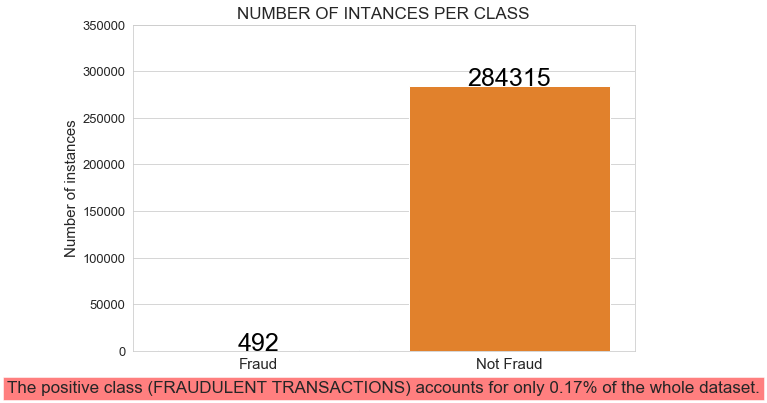

In [110]:
plt.figure(figsize=(9,6))
sns.barplot(x=['Fraud','Not Fraud'], y=[len(ccFraudPos), len(ccFraudNeg)])
plt.title('NUMBER OF INTANCES PER CLASS', fontsize=17)
plt.ylabel('Number of instances', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks([i for i in range(0,400000, 50000)], fontsize=13)
plt.text(x=0, y=len(ccFraudPos), s=str(len(ccFraudPos)), horizontalalignment='center', fontsize=25, color='black')
plt.text(x=1.0, y=len(ccFraudNeg), s=str(len(ccFraudNeg)), horizontalalignment='center', fontsize=25, color='black')
plt.text(x=0.5, y=-45000, s='The positive class (FRAUDULENT TRANSACTIONS) accounts for only ' + 
         str(round((len(ccFraudPos)/len(ccFraudNeg))*100, 2)) + '% of the whole dataset.', 
         bbox=dict(facecolor='red', alpha=0.5), fontsize=17, horizontalalignment='center')
plt.show()

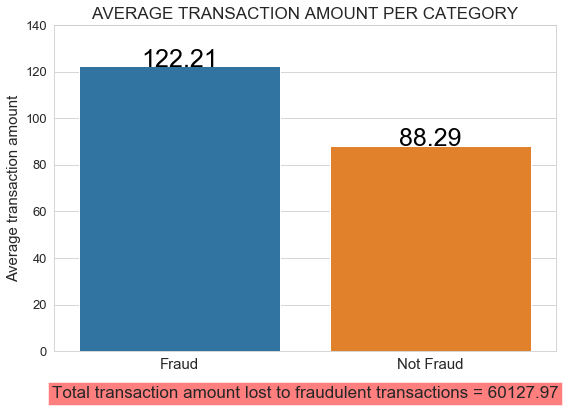

In [112]:
plt.figure(figsize=(9,6))
sns.barplot(x=['Fraud','Not Fraud'], y=[ccFraudPos['Amount'].mean(), ccFraudNeg['Amount'].mean()])
plt.title('AVERAGE TRANSACTION AMOUNT PER CATEGORY', fontsize=17)
plt.ylabel('Average transaction amount', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks([i for i in range(0,150,20)], fontsize=13)
plt.text(x=0, y=round(ccFraudPos['Amount'].mean(), 2), s=str(round(ccFraudPos['Amount'].mean(), 2)), 
         horizontalalignment='center', fontsize=25, color='black')
plt.text(x=1.0, y=round(ccFraudNeg['Amount'].mean(), 2), s=str(round(ccFraudNeg['Amount'].mean(), 2)), 
         horizontalalignment='center', fontsize=25, color='black')
plt.text(x=0.5, y=-20, s='Total transaction amount lost to fraudulent transactions = ' + str(ccFraudPos['Amount'].sum()), 
         bbox=dict(facecolor='red', alpha=0.5), fontsize=17, horizontalalignment='center')
plt.show()

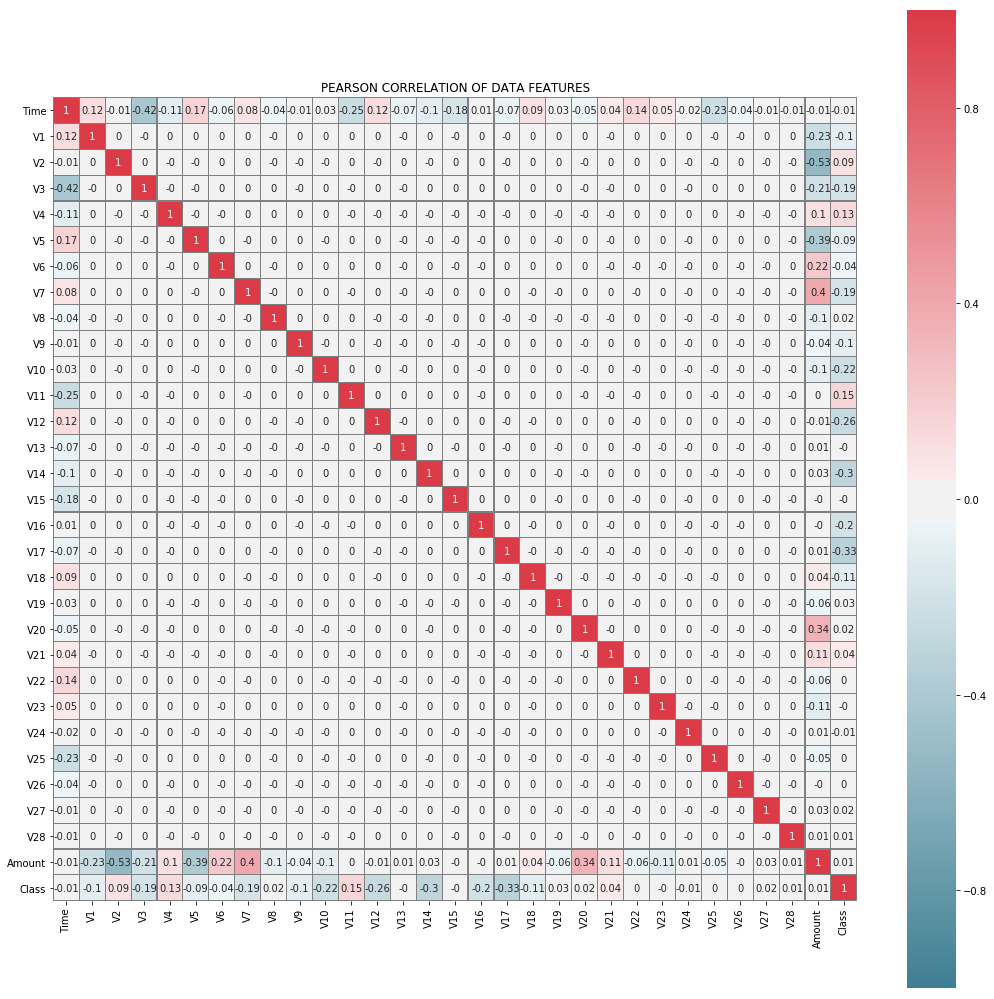

In [35]:
f, ax = plt.subplots(figsize=(18,18))
plt.title('PEARSON CORRELATION OF DATA FEATURES', fontsize=12)
sns.heatmap(ccFraud.iloc[:,:].corr().round(2), linewidths=0.1, vmin=-1.0, vmax=1.0, square=True,
           cmap=sns.diverging_palette(220, 10, as_cmap=True), ax=ax, linecolor='grey', annot=True);

- <a href="#feature_importance">Click here to view the FEATURE IMPORTANCE section</a>
- <a href="#kde">Click here to view the KERNEL DENSITY plot</a>
<a id="correlation_matrix"></a>

- As expected, all the principal components V1, V2, ... V28 have shown no notable linear relationship with one another. This is because the principal components obtained with PCA are independent from one another, therefore V1, V2, ... V28 which are principal components obtained with PCA are independent from one another.
- With Class, some of the features that showed the highest correlation are : V17, V14, 12, V10, V7 and ones that showed the lowest correlation are V13, V15, V22, V23, V25, V26.
- V2 and V5 show some notable negative linear relationship with **Amount.**
- Also, V7 and V20 some notable positive linear relationship with **Amount**.
- With **Time**, V3, V11, V15 and V25 show some notable linear relationship while V1, V5, V12 and V22 show some notable positive linear relationship.


- Next, let's split the data in order to avoid **DATA SNOOPING BIAS**.
    - DATA SNOOPING BIAS occurs when we make certain decisions (like selecting a particular Machine Learning model) based on patterns we stumbled on while exploring the **TEST DATA**. This makes our estimate of the **generalization error using the test data** to be too optimisitic and thereby we launch a system that will not perform as well as expected.

In [56]:
X = ccFraud.drop('Class', axis=1)
y = ccFraud['Class']

- X includes all the predictors.
- y is the response variable.

In [57]:
X.shape, y.shape

((284807, 30), (284807,))

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(allX, y, test_size=0.2, random_state=42)

In [59]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((227845, 30), (56962, 30), (227845,), (56962,))

In [60]:
ccFraud['Class'].value_counts()[1]/ccFraud['Class'].value_counts()[0]

0.0017304750013189597

In [61]:
y_train.value_counts()[1] / y_train.value_counts()[0]

0.0017322412299792043

In [62]:
y_test.value_counts()[1] / y_test.value_counts()[0]

0.0017234102419808666

The two classes have been well represented in the Training and Test set ensuring no **SAMPLING BIAS.**

Now, we can do some more investigation with only the TRAINING SET.

Let's confirm the notable **LINEAR RELATIONSHIPS** we observed between some of the variables.

In [88]:
X_train_class = X_train.copy(deep=True)
X_train_class['Class'] = y_train

In [263]:
def plot_to_assert_correlations(x, y):
    sns.set(font_scale=1.2)
    g = sns.lmplot(x, y, data=X_train_class, hue='Class', markers=["o", "x"], legend_out=False)
    g = (g.set_axis_labels(x, y))

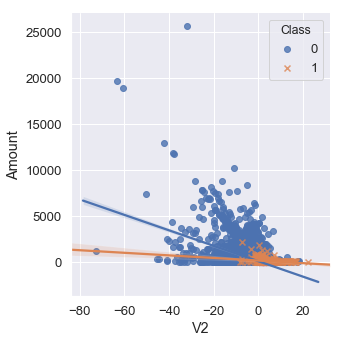

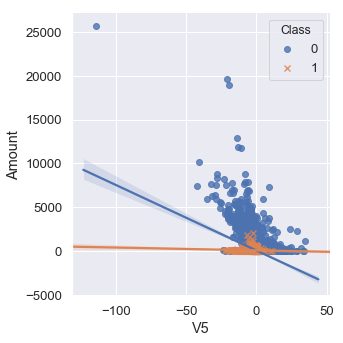

In [264]:
plot_to_assert_correlations('V2', 'Amount'); plot_to_assert_correlations('V5', 'Amount')
plt.show()

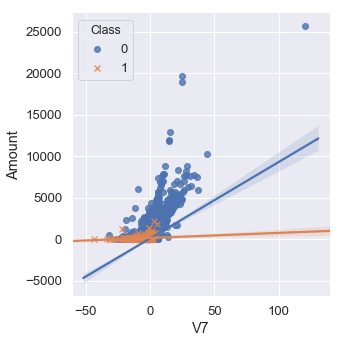

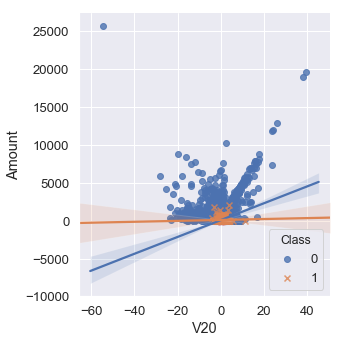

In [389]:
plot_to_assert_correlations('V7', 'Amount'); plot_to_assert_correlations('V20', 'Amount')
plt.show()

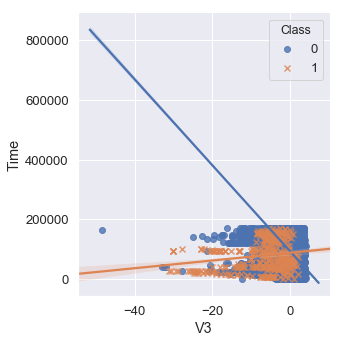

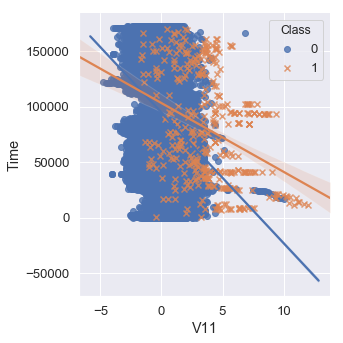

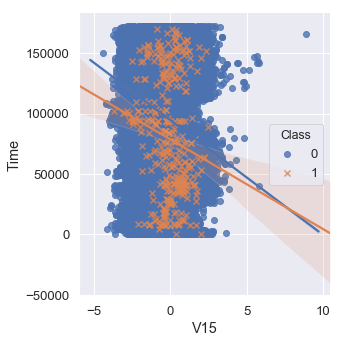

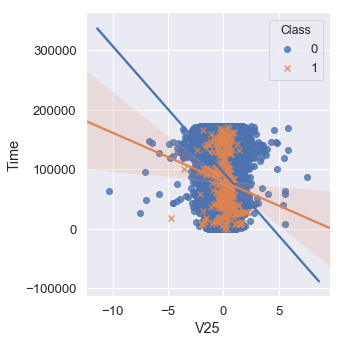

In [229]:
plot_to_assert_correlations('V3', 'Time'); plot_to_assert_correlations('V11', 'Time')
plot_to_assert_correlations('V15', 'Time'); plot_to_assert_correlations('V25', 'Time')
plt.show()

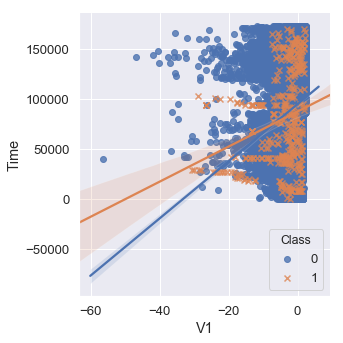

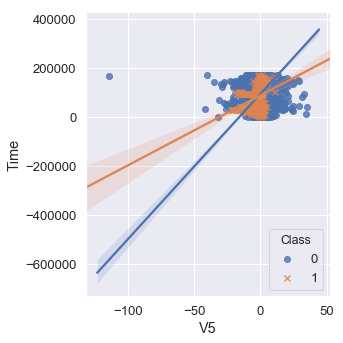

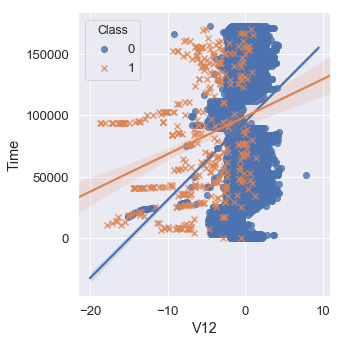

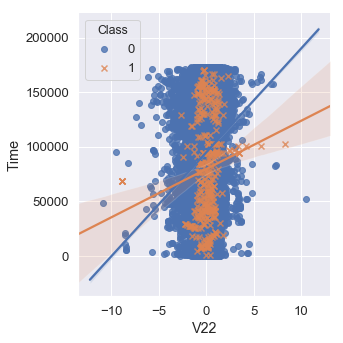

In [231]:
plot_to_assert_correlations('V1', 'Time'); plot_to_assert_correlations('V5', 'Time')
plot_to_assert_correlations('V12', 'Time'); plot_to_assert_correlations('V22', 'Time')
plt.show()

In [ ]:
y_train_pos = y_train[y_train == 1]
y_train_neg = y_train[y_train == 0]
X_train_pos = X_train[y_train == 1]
X_train_neg = X_train[y_train == 0]

temp_X_train_pos = X_train_pos.copy(deep=True)
temp_X_train_neg = X_train_neg.copy(deep=True)
temp_X_train_pos['Class'] = y_train_pos
temp_X_train_neg['Class'] = y_train_neg

<Figure size 432x288 with 0 Axes>

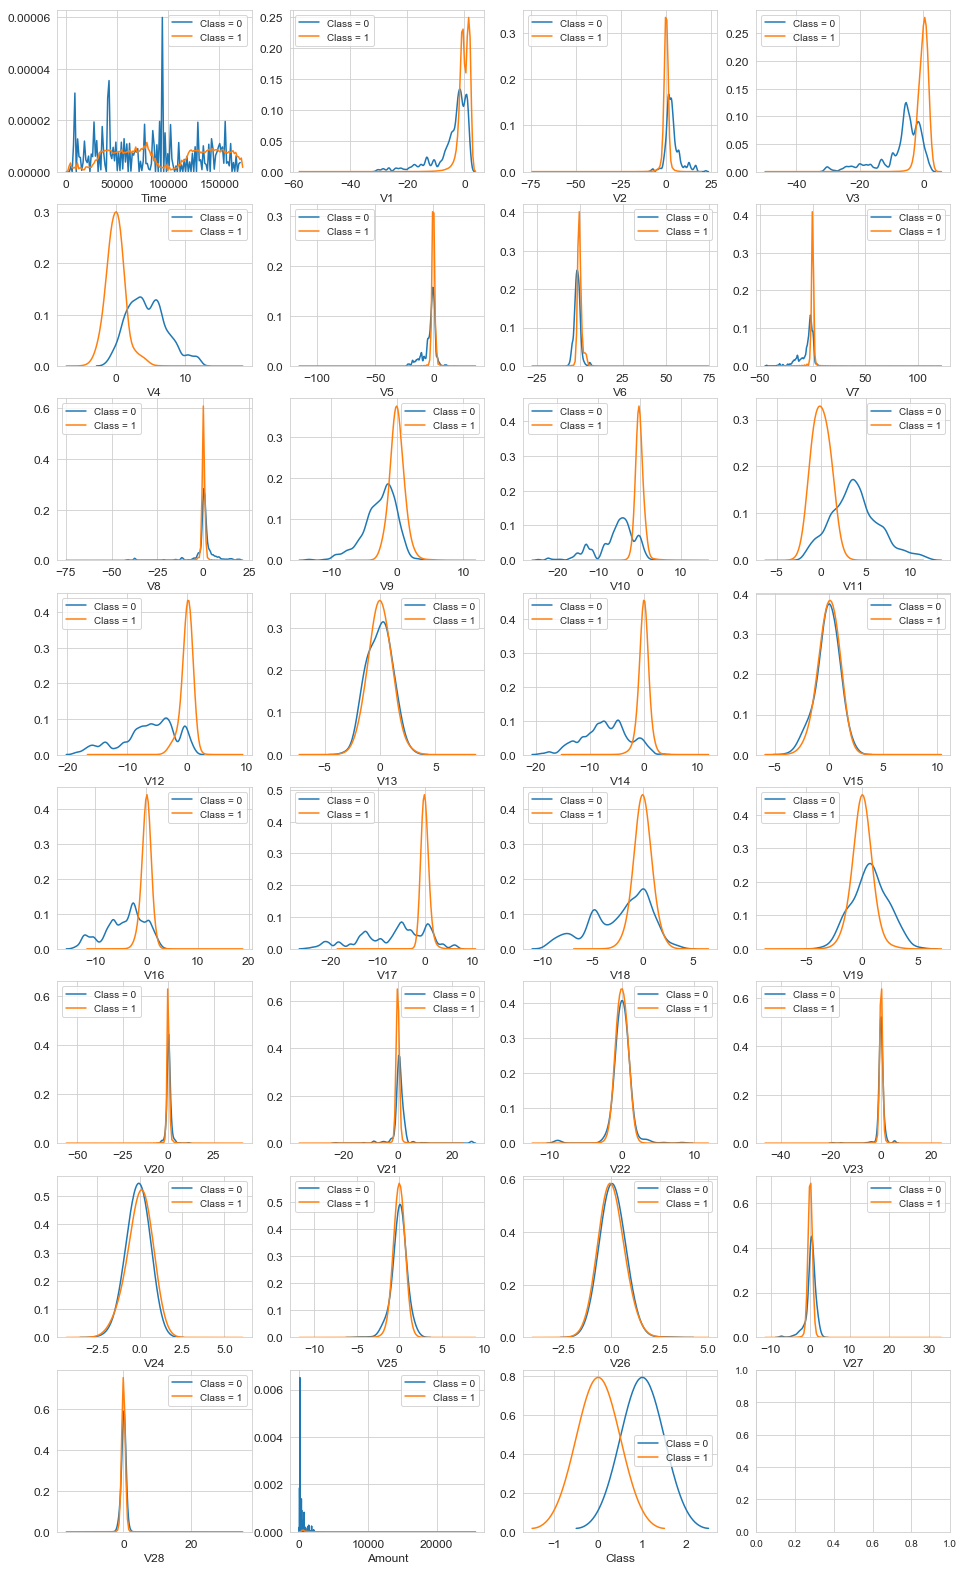

In [66]:
var = list(ccFraud.columns)

i=0
sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))

for feature in var:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(temp_X_train_pos[feature], bw=0.5, label="Class = 0")
    sns.kdeplot(temp_X_train_neg[feature], bw=0.5, label="Class = 1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

- <a href="#correlation_matrix">Click here to view the CORRELATION MATRIX</a>
<a id="kde"></a>
- <a href="#feature_importance">Click here to view the FEATURE IMPORTANCE PLOT</a>

- For Class values 0 and 1:
    - Some features, V17, V14, V12, have clearly separated distributionS while
    - some others, V23, V24, V26, have indistinguishable distributions.
- It can be observed that the variables that showed high absolute correlation in the correlation matrix have clearly separable distributions and vice versa.
  
- Generally, the features have very similar scales centered around 0 with only Time and Amount being different

### Model Selection

In [114]:
from sklearn.metrics import precision_recall_curve, auc, roc_auc_score
from sklearn.model_selection import cross_val_predict

In [115]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier

classifiers = [
    LogisticRegression(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    KNeighborsClassifier(),
    GaussianNB(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    AdaBoostClassifier(),
    BaggingClassifier()
]

In [116]:
def precision_recall_or_probability(classifier, train_X, train_y, prob=False):
    from sklearn.metrics import precision_recall_curve
    name = classifier.__class__.__name__
    probability = cross_val_predict(classifier, train_X, train_y, cv=3, method='predict_proba')
    probability_positive_class = probability[:, 1]
    if prob:
        return probability_positive_class
    precision, recall, _ = precision_recall_curve(train_y, probability_positive_class)
    return (name, (precision, recall))

In [117]:
class timeit():
    from datetime import datetime
    def __enter__(self):
        self.start = self.datetime.now()
    def __exit__(self, *args, **kwargs):
        print('Execution Time: {}'.format(self.datetime.now() - self.start))

In [118]:
with timeit():    
    classifiers_precision_recall = []
    for classifier in classifiers:
        classifiers_precision_recall.append(precision_recall_or_probability(classifier, X_train, y_train))

Execution Time: 0:53:08.228257


In [146]:
def area_under_precision_recall_curve(classifiers_precision_recall):
    from sklearn.metrics import auc
    area_under_precision_recall = []
    for classifier in classifiers_precision_recall:
        classifiers_name_area = [classifier[0], auc(classifier[1][1], classifier[1][0])]
        area_under_precision_recall.append(classifiers_name_area)
    area_under_precision_recall = sorted(area_under_precision_recall, key=lambda x: x[1])
    return area_under_precision_recall

In [147]:
area_under_precision_recall_curve = area_under_precision_recall_curve(classifiers_precision_recall)

In [177]:
area_under_precision_recall_curve

[['KNeighborsClassifier', 0.13139544214210316],
 ['GaussianNB', 0.34135971952795774],
 ['QuadraticDiscriminantAnalysis', 0.4953476427461237],
 ['LogisticRegression', 0.5555059706410537],
 ['GradientBoostingClassifier', 0.6637599119432953],
 ['DecisionTreeClassifier', 0.743235781063673],
 ['LinearDiscriminantAnalysis', 0.7635702642806516],
 ['AdaBoostClassifier', 0.7659579024157294],
 ['RandomForestClassifier', 0.8273379287773095],
 ['BaggingClassifier', 0.8389200678056328]]

In [169]:
def plot_area(classifiers_names, classifiers_area, xlabel):
    plt.figure(figsize=(25,10))
    plt.barh(classifiers_names, classifiers_area)
    plt.axvline(x=0.80, color='green', linewidth=5, linestyle='--')
    plt.xlabel(xlabel, fontsize=25)
    plt.xticks(np.arange(0, 1.1, step=0.1), rotation=45, fontsize=25)
    plt.yticks(fontsize=25)
    plt.grid(axis='y', linewidth=2)

In [170]:
classifiers_name = []
classifiers_area = []
for classifier_name, classifier_area in area_under_precision_recall_curve:
    classifiers_name.append(classifier_name)
    classifiers_area.append(classifier_area)

In [185]:
classifiers_name, classifiers_area

(['KNeighborsClassifier',
  'GaussianNB',
  'QuadraticDiscriminantAnalysis',
  'LogisticRegression',
  'GradientBoostingClassifier',
  'DecisionTreeClassifier',
  'LinearDiscriminantAnalysis',
  'AdaBoostClassifier',
  'RandomForestClassifier',
  'BaggingClassifier'],
 [0.13139544214210316,
  0.34135971952795774,
  0.4953476427461237,
  0.5555059706410537,
  0.6637599119432953,
  0.743235781063673,
  0.7635702642806516,
  0.7659579024157294,
  0.8273379287773095,
  0.8389200678056328])

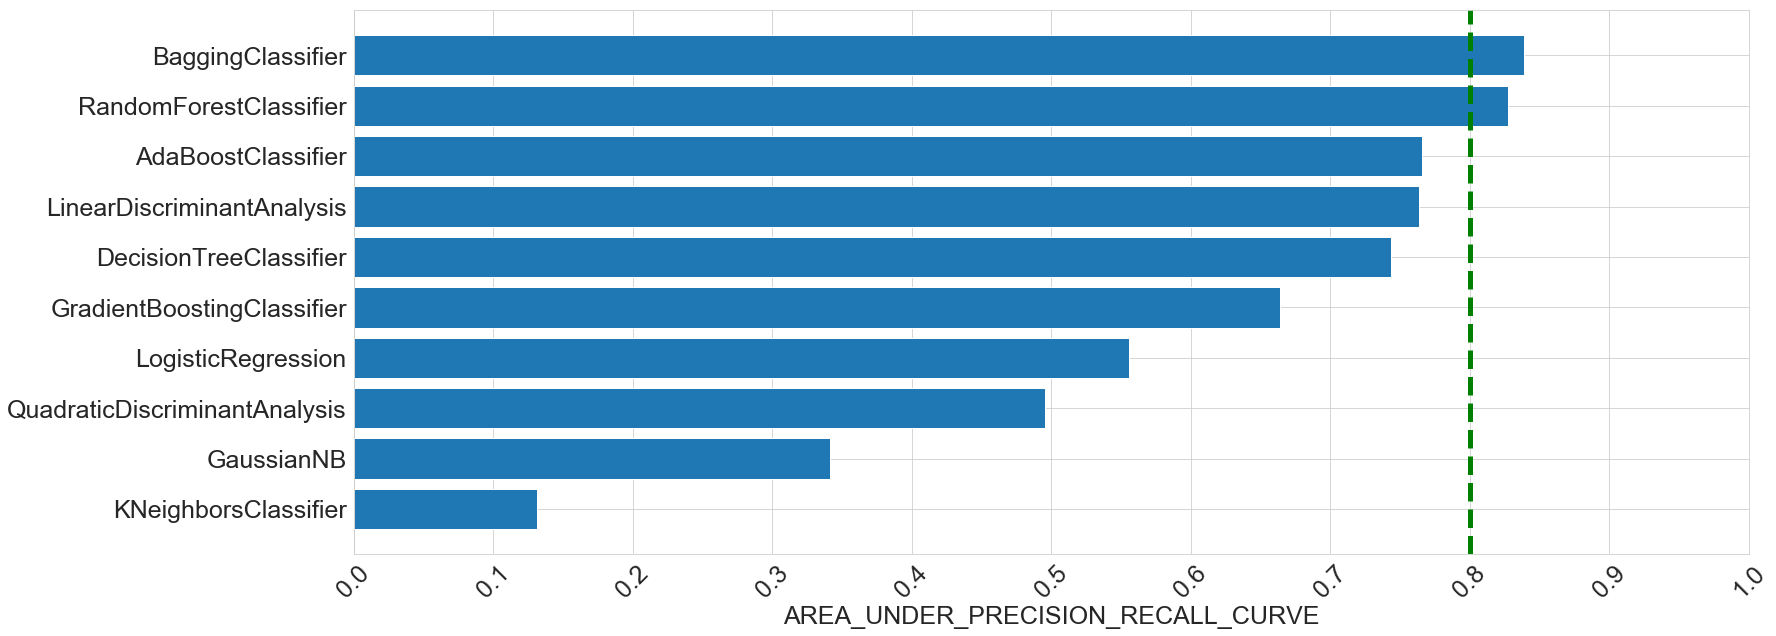

In [171]:
plot_area(classifiers_name, classifiers_area, 'AREA_UNDER_PRECISION_RECALL_CURVE')
plt.show()

In [261]:
def plot_precision_recall_curve(classifiers_precision_recall):
    plt.figure(figsize=(25,10))
    for classifier in classifiers_precision_recall:
        label = classifier[0]
        precision, recall = classifier[1][0], classifier[1][1]
        plt.plot(recall, precision, label=label, linewidth=2)
    plt.xlabel("Recall", fontsize=26)
    plt.ylabel("Precision", fontsize=26)
    plt.axis([0, 1, 0, 1])
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.legend(fontsize=17)
    plt.show()

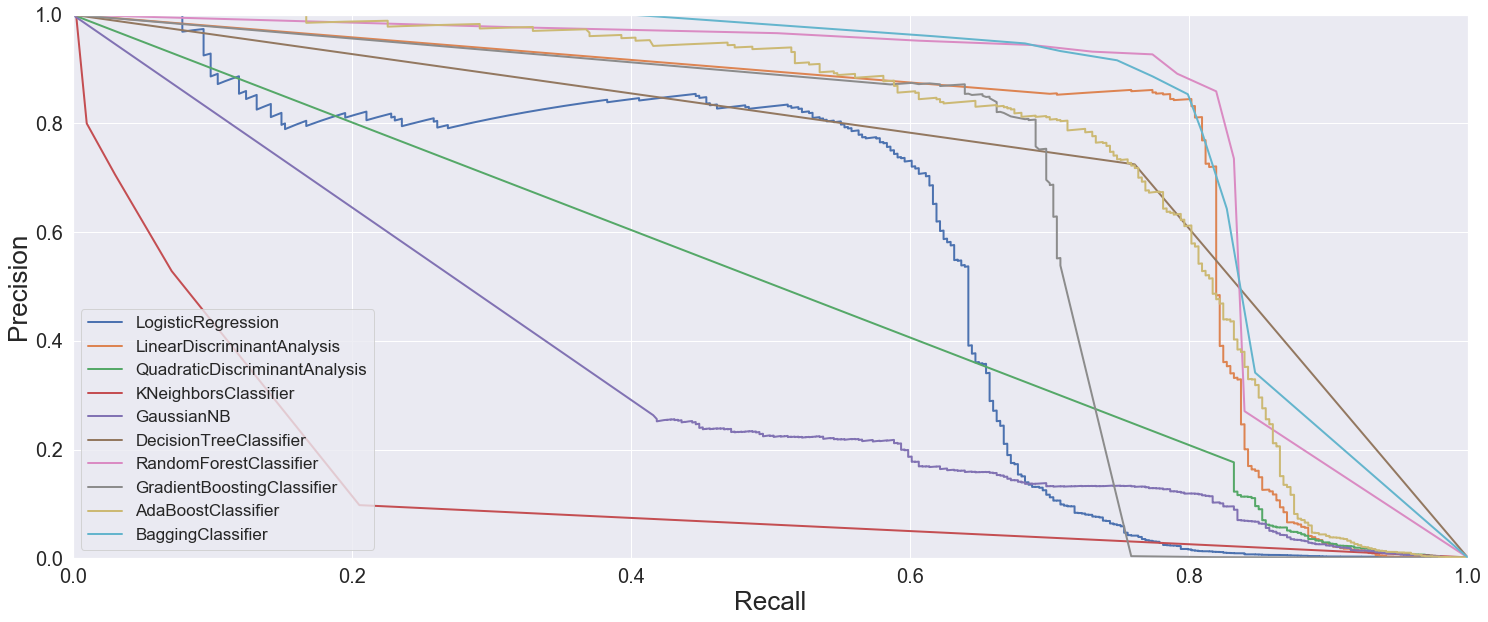

In [262]:
plot_precision_recall_curve(classifiers_precision_recall)

- Generally, the ensembles (including DecisionTreeClassifier) have done a good job. This is as expected because PCA helps in making the DecisionTreeClassifier to do a better job at classifying. This is so because the splits created by the DecisionTreeClassifier are orthogonal (perpendicular) and all the principal components from a PCA are orthogonal.
- RandomForestClassifier and BaggingClassifer are the two classifiers who have done the best job in this task. 
- Next, let's tune some of their hyperparameters in order to improve the accuracy.
- Before then, let's quickly take a look at why **AREA UNDER THE ROC CURVE** won't be a good metric for an **IMBALANCED DATA**

### Proof that ROC won't be appropriate for IMBALANCED data!!

In [175]:
with timeit():
    area_under_ROC = []
    for classifier in classifiers:
        area_under_ROC.append((classifier.__class__.__name__, 
             roc_auc_score(y_train, precision_recall_or_probability(classifier, someX_train, y_train, prob=True))))

Execution Time: 0:50:36.225785


In [179]:
area_under_ROC

[('LogisticRegression', 0.8987331058330029),
 ('LinearDiscriminantAnalysis', 0.9525121236019217),
 ('QuadraticDiscriminantAnalysis', 0.9657094660227705),
 ('KNeighborsClassifier', 0.6012397728014024),
 ('GaussianNB', 0.9630707429437527),
 ('DecisionTreeClassifier', 0.8728590329278708),
 ('RandomForestClassifier', 0.9311389252869036),
 ('GradientBoostingClassifier', 0.8094884808904117),
 ('AdaBoostClassifier', 0.9700132936536762),
 ('BaggingClassifier', 0.9197492684707658)]

In [180]:
classifiers_name

['KNeighborsClassifier',
 'GaussianNB',
 'QuadraticDiscriminantAnalysis',
 'LogisticRegression',
 'GradientBoostingClassifier',
 'DecisionTreeClassifier',
 'LinearDiscriminantAnalysis',
 'AdaBoostClassifier',
 'RandomForestClassifier',
 'BaggingClassifier']

In [184]:
sorted_area_under_ROC = []
for classifier_PR in classifiers_name:
    for var in area_under_ROC:
        if classifier_PR == var[0]:
            sorted_area_under_ROC.append(list(var))
sorted_area_under_ROC

[['KNeighborsClassifier', 0.6012397728014024],
 ['GaussianNB', 0.9630707429437527],
 ['QuadraticDiscriminantAnalysis', 0.9657094660227705],
 ['LogisticRegression', 0.8987331058330029],
 ['GradientBoostingClassifier', 0.8094884808904117],
 ['DecisionTreeClassifier', 0.8728590329278708],
 ['LinearDiscriminantAnalysis', 0.9525121236019217],
 ['AdaBoostClassifier', 0.9700132936536762],
 ['RandomForestClassifier', 0.9311389252869036],
 ['BaggingClassifier', 0.9197492684707658]]

In [259]:
def plot_area_or_get_dataframe(area_under_1, area_under_2, names=[], dataframe=False):
    classifiers_name_1 = []
    classifiers_name_2 = []
    classifiers_area_1 = []
    classifiers_area_2 = []
    assert len(area_under_1) == len(area_under_2)
    for i in range(len(area_under_1)):
        classifiers_name_1.append(area_under_1[i][0])
        classifiers_name_2.append(area_under_2[i][0])
        classifiers_area_1.append(area_under_1[i][1])
        classifiers_area_2.append(area_under_2[i][1])
    assert classifiers_name_1 == classifiers_name_2
    classifiers_area = [classifiers_area_1, classifiers_area_2]
    df = pd.DataFrame({names[0]: classifiers_area[0],
                  names[1]: classifiers_area[1]}, index=classifiers_name_1)
    if dataframe:
        new_column = 'is_' + names[0] + '_greater_than_' + names[1]
        df[new_column] = df[names[0]] > df[names[1]]
        return df
    df.plot.barh(figsize=(13,7), fontsize=12, width=0.8)

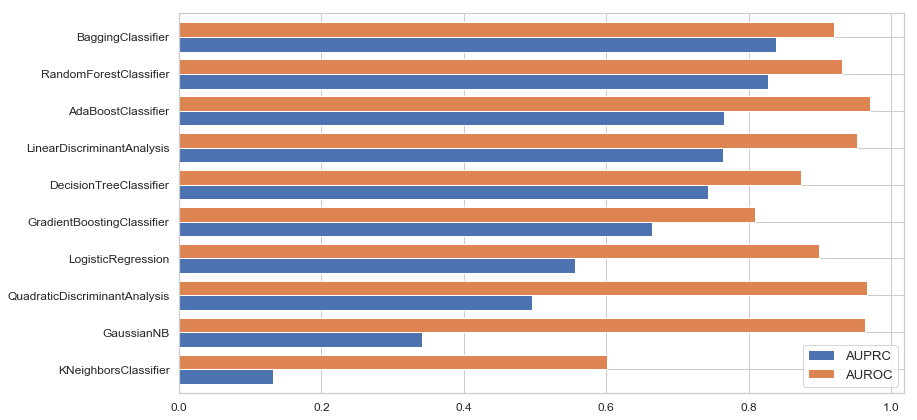

In [343]:
plot_area_or_get_dataframe(area_under_precision_recall_curve, sorted_area_under_ROC, names=['AUPRC', 'AUROC'])
plt.show()

In [195]:
plot_area_or_get_dataframe(area_under_precision_recall_curve, sorted_area_under_ROC, names=['AUPRC', 'AUROC'], dataframe=True)

,AUPRC,AUROC,is_AUPRC_greater_than_AUROC
KNeighborsClassifier,0.131395,0.601240,False
GaussianNB,0.341360,0.963071,False
QuadraticDiscriminantAnalysis,0.495348,0.965709,False
LogisticRegression,0.555506,0.898733,False
GradientBoostingClassifier,0.663760,0.809488,False
DecisionTreeClassifier,0.743236,0.872859,False
LinearDiscriminantAnalysis,0.763570,0.952512,False
AdaBoostClassifier,0.765958,0.970013,False
RandomForestClassifier,0.827338,0.931139,False
BaggingClassifier,0.838920,0.919749,False


With the area under the ROC curve (AUROC), it is possible to think the classifiers have done a really good job. However, in the real sense this is misleading. This is because of the presence of True Negatives in the calculation of the ROC. Also, what this does is that it makes our estimate of the generalization error to be too optimisitic and thereby we launch a system that will not perform as well as expected. The area under the Precision-Recall curve (AURPC) helps to control for this optimism by ignoring the True Negatives in it's calculation.

### Hyperparameter Tuning

In [234]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'n_estimators': [25, 50, 75], 'max_features': ["log2", 0.4, None, 0.8], 
               'min_samples_leaf': [0.5, 1], }]

rfc = RandomForestClassifier(random_state=42)
scoring = {'recall': 'recall', 'precsion': 'precision', 'average_precision': 'average_precision'}
grid_search = GridSearchCV(rfc, param_grid, cv=3, scoring=scoring, refit='average_precision')
with timeit():
    grid_search.fit(X_train, y_train)

Execution Time: 9:30:27.167593


### Evaluating the Result

In [519]:
grid_search.best_params_

{'max_features': 0.4, 'min_samples_leaf': 1, 'n_estimators': 75}

In [520]:
cv_result = pd.DataFrame(grid_search.cv_results_)
cv_result.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_min_samples_leaf,param_n_estimators,params,split0_test_recall,split1_test_recall,split2_test_recall,mean_test_recall,std_test_recall,rank_test_recall,split0_train_recall,split1_train_recall,split2_train_recall,mean_train_recall,std_train_recall,split0_test_precsion,split1_test_precsion,split2_test_precsion,mean_test_precsion,std_test_precsion,rank_test_precsion,split0_train_precsion,split1_train_precsion,split2_train_precsion,mean_train_precsion,std_train_precsion,split0_test_average_precision,split1_test_average_precision,split2_test_average_precision,mean_test_average_precision,std_test_average_precision,rank_test_average_precision,split0_train_average_precision,split1_train_average_precision,split2_train_average_precision,mean_train_average_precision,std_train_average_precision
0,3.747738,0.713273,2.027315,0.258651,log2,0.5,25,"{'max_features': 'log2', 'min_samples_leaf': 0.5, 'n_estimators': 25}",0.0,0.0,0.0,0.0,0.0,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13,0.0,0.0,0.0,0.0,0.0,0.001738,0.001725,0.001725,0.001729,0.000006,13,0.001725,0.001731,0.001731,0.001729,0.000003
1,5.993925,0.050336,3.272639,0.008746,log2,0.5,50,"{'max_features': 'log2', 'min_samples_leaf': 0.5, 'n_estimators': 50}",0.0,0.0,0.0,0.0,0.0,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13,0.0,0.0,0.0,0.0,0.0,0.001738,0.001725,0.001725,0.001729,0.000006,13,0.001725,0.001731,0.001731,0.001729,0.000003
2,8.766561,0.064092,4.774275,0.007036,log2,0.5,75,"{'max_features': 'log2', 'min_samples_leaf': 0.5, 'n_estimators': 75}",0.0,0.0,0.0,0.0,0.0,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13,0.0,0.0,0.0,0.0,0.0,0.001738,0.001725,0.001725,0.001729,0.000006,13,0.001725,0.001731,0.001731,0.001729,0.000003


In [521]:
mean_columns = []
for column in result.iloc[:,7:].columns:
    if column.startswith('mean') or column.startswith('params'):
        mean_columns.append(column)

In [524]:
mean_result = cv_result.loc[:,mean_columns]
mean_result

,params,mean_test_recall,mean_train_recall,mean_test_precsion,mean_train_precsion,mean_test_average_precision,mean_train_average_precision
0,"{'max_features': 'log2', 'min_samples_leaf': 0.5, 'n_estimators': 25}",0.000000,0.000000,0.000000,0.000000,0.001729,0.001729
1,"{'max_features': 'log2', 'min_samples_leaf': 0.5, 'n_estimators': 50}",0.000000,0.000000,0.000000,0.000000,0.001729,0.001729
2,"{'max_features': 'log2', 'min_samples_leaf': 0.5, 'n_estimators': 75}",0.000000,0.000000,0.000000,0.000000,0.001729,0.001729
3,"{'max_features': 'log2', 'min_samples_leaf': 1, 'n_estimators': 25}",0.743754,0.997460,0.936075,0.998737,0.820945,0.999986
4,"{'max_features': 'log2', 'min_samples_leaf': 1, 'n_estimators': 50}",0.746279,0.997465,0.945315,1.000000,0.831162,1.000000
5,"{'max_features': 'log2', 'min_samples_leaf': 1, 'n_estimators': 75}",0.753913,1.000000,0.945916,1.000000,0.832249,1.000000
6,"{'max_features': 0.4, 'min_samples_leaf': 0.5, 'n_estimators': 25}",0.000000,0.000000,0.000000,0.000000,0.001729,0.001729
7,"{'max_features': 0.4, 'min_samples_leaf': 0.5, 'n_estimators': 50}",0.000000,0.000000,0.000000,0.000000,0.001729,0.001729
8,"{'max_features': 0.4, 'min_samples_leaf': 0.5, 'n_estimators': 75}",0.000000,0.000000,0.000000,0.000000,0.001729,0.001729
9,"{'max_features': 0.4, 'min_samples_leaf': 1, 'n_estimators': 25}",0.774134,0.997460,0.941851,0.998737,0.827476,0.999990


From the dataframes above, it's obvious that min_samples_leaf: 0.5 -- was a bad hyperparameter considered. Let's drop all the combinations that had it.

In [525]:
cv_result.drop(labels=[6,1,20,19,18,14,13,12,8,7,2,0], inplace=True)

In [526]:
#converting the params column values from a dictionary to string: ''{max_features}-{min-samples_leaf}-{n-estimators'}
str_result_params = [str(cv_result.params[i]['max_features']) + '-' + str(cv_result.params[i]['min_samples_leaf']) 
                     + '-' + str(cv_result.params[i]['n_estimators']) for i in result.params.index]
str_result_params

['log2-1-25',
 'log2-1-50',
 'log2-1-75',
 '0.4-1-25',
 '0.4-1-50',
 '0.4-1-75',
 'None-1-25',
 'None-1-50',
 'None-1-75',
 '0.8-1-25',
 '0.8-1-50',
 '0.8-1-75']

In [527]:
mean_result.drop(labels=[6,1,20,19,18,14,13,12,8,7,2,0], inplace=True)
mean_result['params'] = str_result_params
mean_result.rename(index=str, columns={'params': 'Tuned Hyperparameters'}, inplace=True)
mean_result.set_index('Tuned Hyperparameters', inplace=True)

In [528]:
mean_result.head()

,mean_test_recall,mean_train_recall,mean_test_precsion,mean_train_precsion,mean_test_average_precision,mean_train_average_precision
Tuned Hyperparameters,,,,,,
log2-1-25,0.743754,0.997460,0.936075,0.998737,0.820945,0.999986
log2-1-50,0.746279,0.997465,0.945315,1.000000,0.831162,1.000000
log2-1-75,0.753913,1.000000,0.945916,1.000000,0.832249,1.000000
0.4-1-25,0.774134,0.997460,0.941851,0.998737,0.827476,0.999990
0.4-1-50,0.766559,0.997465,0.938517,1.000000,0.832875,1.000000


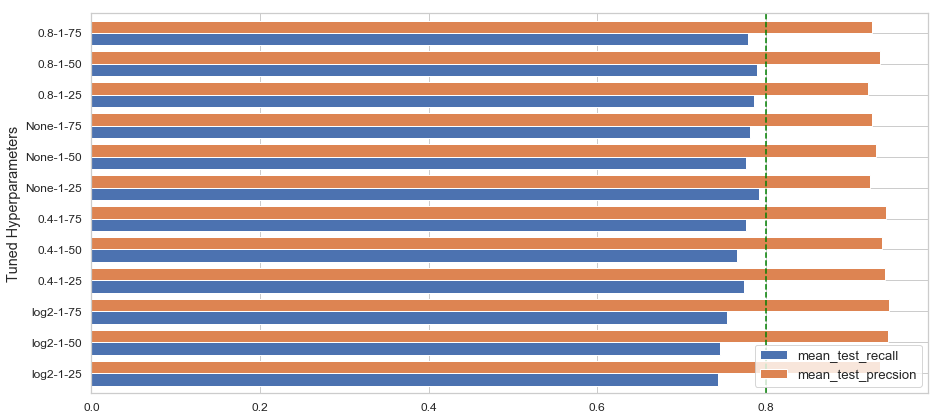

In [529]:
sns.set_style('whitegrid')
mean_result[['mean_test_recall', 'mean_test_precsion']].plot.barh(figsize=(15,7), fontsize=12, width=0.8)
plt.axvline(0.8, linestyle='--', color='green')
plt.show()

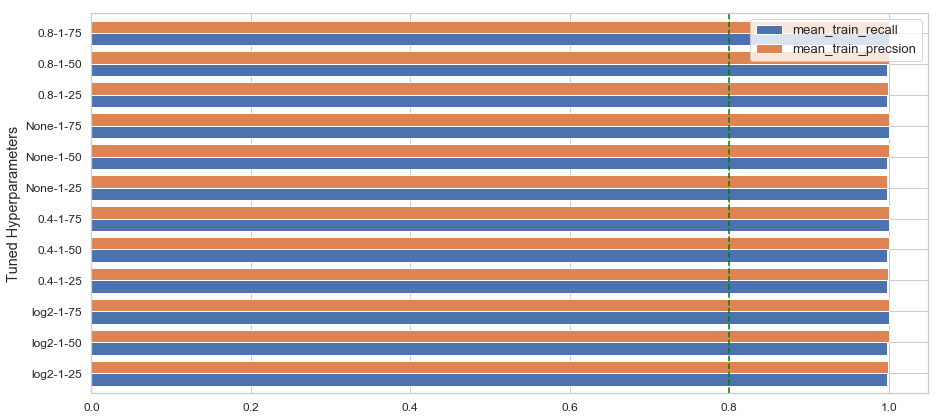

In [530]:
sns.set_style('whitegrid')
mean_result[['mean_train_recall', 'mean_train_precsion']].plot.barh(figsize=(15,7), fontsize=12, width=0.8)
plt.axvline(0.8, linestyle='--', color='green')
plt.show()

- All the models are overfitting!
- Using the average_precision_score, we obtained the best parameters out of the ones given to be: {'max_features': 0.4, 'min_samples_leaf': 1, 'n_estimators': 75}. 


**GOING FORWARD:**
- For the max_features: 0.4 is equivalent to 12 features, log2 is equivalent to 5 features, None is equivalent to 30 features and 0.8 is equivalent to 24 features. Since the best model picked 0.4 meaning 12 features, and we had other options of 5, 12 and 30 features, then it would be nice to tune for values between 6 and 23 features, perhaps we can arrive at a better model.
- Also, the number of estimators was chosen to be 75 which is at the upper bound of the n_estimators hyperparameter. Therefore, it would be nice to tune for values greater than 75, perhaps also we can arrive at a higher accuracy.
- Finally, since our models are overfitting, we should tune some more hyperparameters say **max_depth**.

### Feature Importance

In [533]:
# Get numerical feature importances
importances = list(grid_search.best_estimator_.feature_importances_)
# List of lists with variable and importance
feature_importances = [[feature, importance] for feature, importance in zip(X.columns, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

In [534]:
features = []
importances = []
for feature, importance in feature_importances:
    features.append(feature)
    importances.append(importance)

In [535]:
feature_importance_df = pd.DataFrame({'features':features, 'importances':importances})

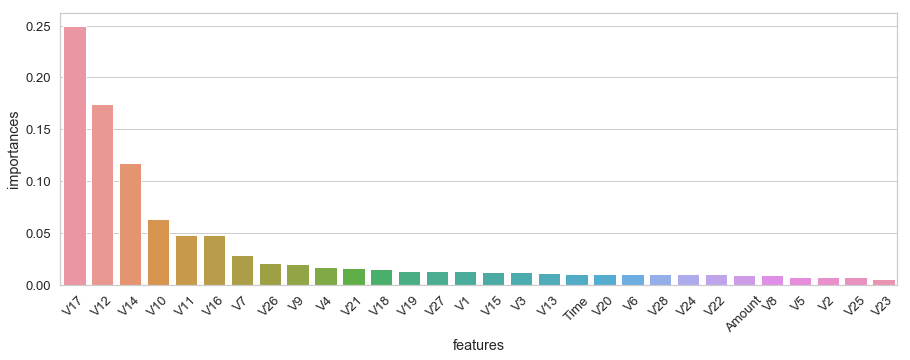

In [538]:
sns.barplot(x='features', y='importances', data=feature_importance_df)
plt.xticks(rotation=45)
plt.show()

- <a href="#correlation_matrix">Click here to view the CORRELATION MATRIX</a>
<a id="feature_importance"></a>
- <a href="#kde">Click here to view the KERNEL DENSITY plot</a>

- Based on the correlation of the features with Class, the result of the feature importance is similar to the correlation matrix. In other words, the higher the absolute value of correlation, the higher the feature importance and vice versa.
- Bssed on how clearly separable the distributions are, the result of the feature importance is similar to the kernel density plot. In other words, the more separable the distributions are, the higher the feature importance and vice versa.

### TEST ERROR/ GENERALIZATION ERROR / OUT-OF-SAMPLE ERROR

In [541]:
pred_proba = grid_search.best_estimator_.predict_proba(X_test)

In [544]:
pos_pred_proba = pred_proba[:,1]

In [547]:
precision, recall, _ = precision_recall_curve(y_test, pos_pred_proba)

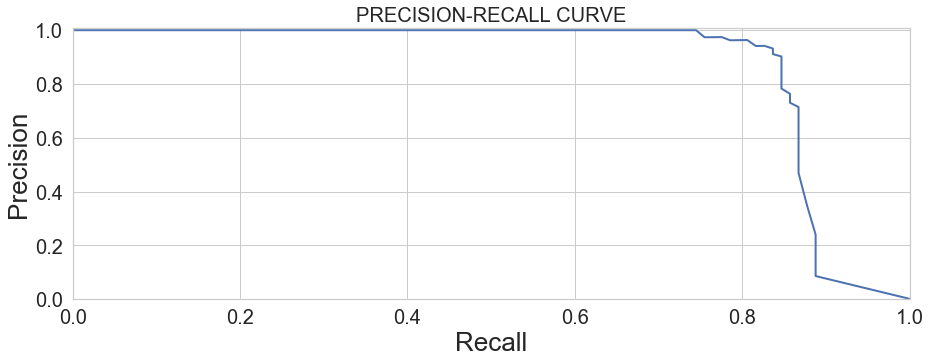

In [562]:
plt.plot(recall, precision, linewidth=2)
plt.xlabel("Recall", fontsize=26)
plt.ylabel("Precision", fontsize=26)
plt.axis([0, 1, 0, 1.01])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('PRECISION-RECALL CURVE', fontsize=20)
plt.show()

In [564]:
print('AREA UNDER THE PRECISION RECALL CURVE : ', str(round(auc(recall, precision), 2)))

AREA UNDER THE PRECISION RECALL CURVE :  0.87


In [566]:
y_test_pos = y_test[y_test == 1]
y_test_neg = y_test[y_test == 0]

In [590]:
pred = grid_search.best_estimator_.predict(X_test)

In [591]:
y_test_pos.shape, y_test_neg.shape

((98,), (56864,))

In [602]:
pred_pos = pred[y_test == 1]
pred_neg = pred[y_test == 0]

In [604]:
sum(pred_pos == y_test_pos), sum(pred_neg == y_test_neg)

(78, 56861)

The model predicted 78 fraudulent transactions correctly out of the total 98 fraudulent transactions in the test set and predicted 56,861 non-fraudulent transactions correctly out of the total 56,864 non fraudulent transactions in the test set. This indicate that the current model has incorrectly classified 20 fraudulent transactions as not fraudulent and 3 not fraudulent transactions as fraudulent. This indicates that our model has a higher PRECISION to RECALL.
- PRECISION = TP/TP+FP
- RECALL = TP/TP+FN

where; 
      - TP = True Positives = 78
      - FP = False Positives = 3
      - FN = False Negatives = 20

In [607]:
print('PRECISION = ', str(78/(78+3)))

PRECISION =  0.9629629629629629


In [608]:
print('RECALL = ', str(78/(78+20)))

RECALL =  0.7959183673469388


# END OF NOTEBOOK (FOR NOW)!!!